**Chapter 7: Categorical AND Categorical Analysis**

We have already compared the mean/median values (numerical variable) per category (categorical variable). Examples: the mean charges on insurance per region, median bmi for smokers vs. non-smokers.

What if we want to compare **CATEGORIES** with **OTHER CATEGORIES**? *Examples*: Is there a difference in the number of smokers per region vs. non-smokers per region? (**Categorical variables**: *smoker* and *region*). Does someone's gender influence whether they smoke or not? (Categorical variables: sex and smoker)

In [1]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**EASY BAR CHARTS**: One easy way to compare categorical variables with one another is through simple charts of counts for each category. The barcharts below simply show the number of men and women per region. This is a really easy way to see what your categories look like!

**Categorical Variables**: *Sex* and *Region*

**Question**: Is there a difference in the number of men and women for each region?

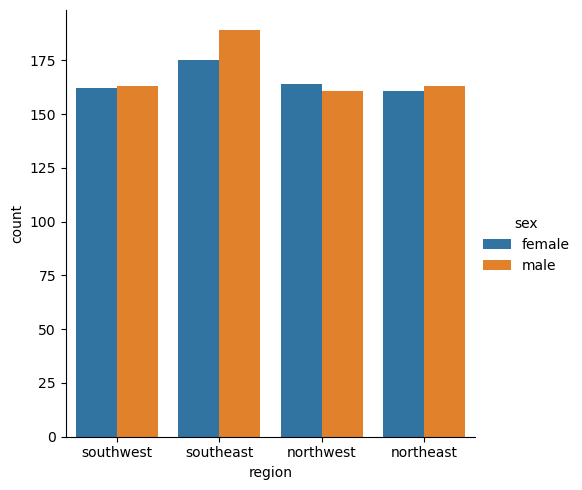

In [2]:
viz = sns.catplot(x='region', hue='sex', kind="count", data=df)

**Question**: Is there a difference in the number of men for each region? Women?

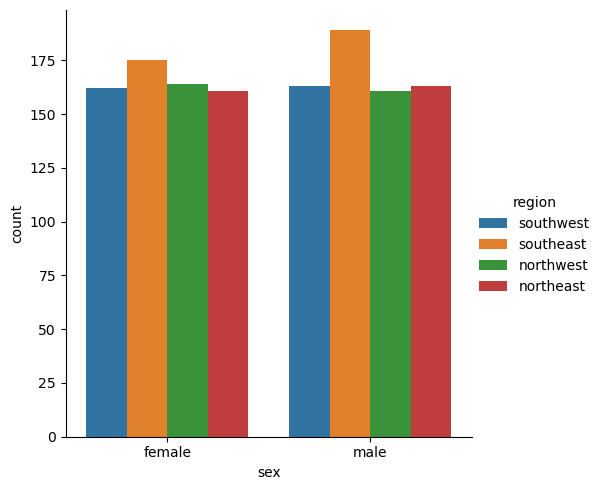

In [3]:
viz = sns.catplot(x='sex', hue='region', kind="count", data=df)

**Question**: What about smokers vs. non-smokers? We are splitting the data up even more and comparing THREE categorical variables with each other. *WARNING: We are splitting up the data into small groups, so we want to make sure our dataset has enough of each category to see a difference.*

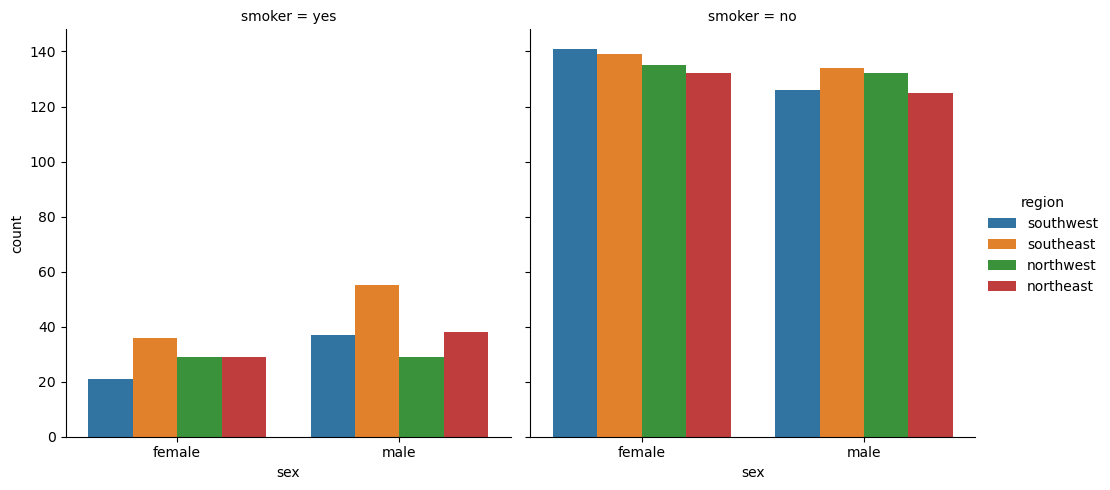

In [4]:
viz = sns.catplot(x='sex', hue='region', col='smoker', kind="count", data=df)

**CHANGE COMPARISONS:** Even though we are looking at the same three categorical variables, we can rearrange them in our code/charts in order to do a different type of comparison. This is totally up to the analyst (you) and what the analyst (you) is trying to communicate to others. 

*Example*: Look at the charts above and below. What stands out to you RIGHT AWAY when you look at each? What differences become most apparent? Think along these lines in order to communicate properly.

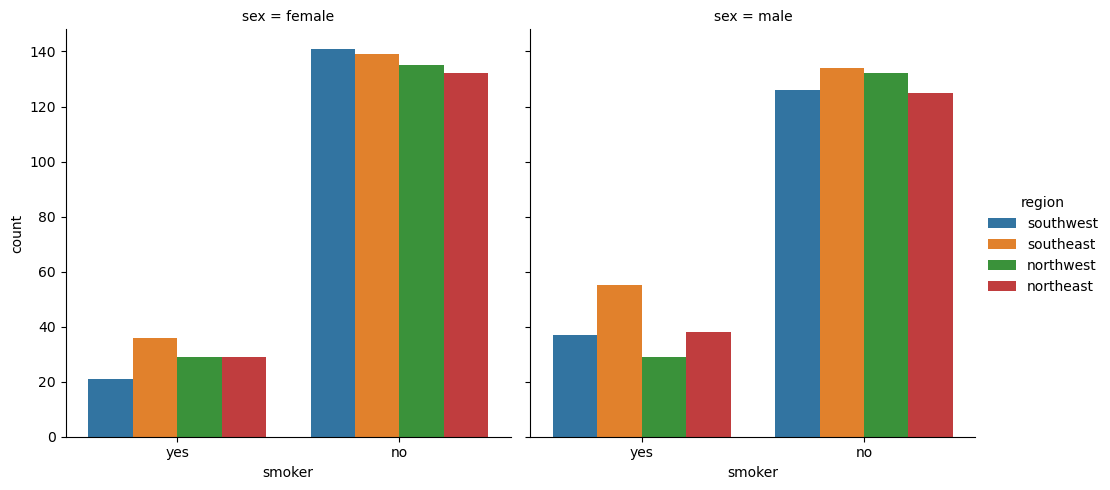

In [5]:
viz = sns.catplot(x='smoker', hue='region', col='sex', kind="count", data=df)

Is the following collection of charts actually helpful? Potentially, but it all depends on what the analyst wants to see or communicate with others.

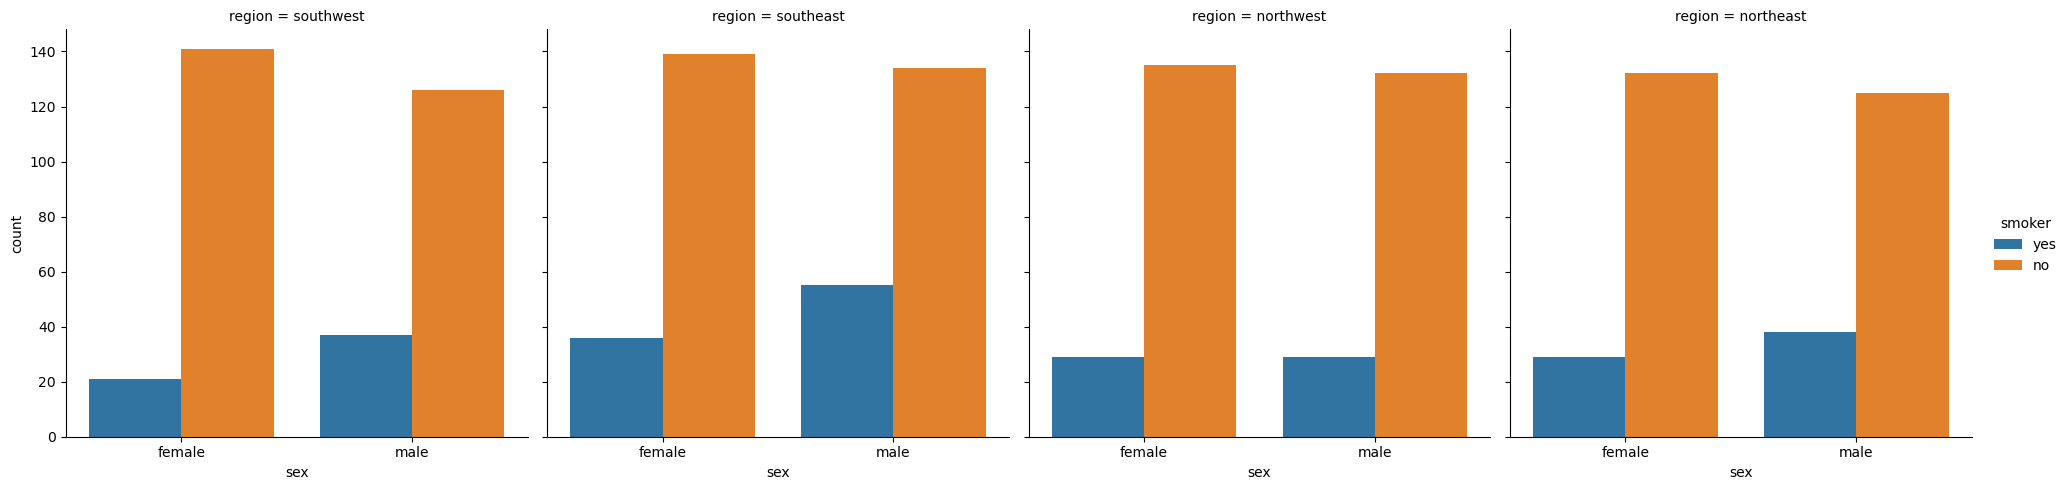

In [6]:
viz = sns.catplot(x='sex', hue='smoker', col='region', kind="count", data=df)

**STATISTICS**: Visualizations are nice, quick ways to do some straightforward analysis and share with others. All of the above charts show that there are CLEARLY more non-smokers than smokers in our dataset. However, they are not helpful in telling us the following:

1) Does someone's sex or region influence their decision to smoke or not? Or vice versa? (In other words, is there a relationship between any of these variables?)
2) Are the count differences we see in any of the charts actually significant or not?

We see more non-smokers than smokers, but all this means is that we have more non-smokers than smokers in our dataset. It tells us nothing about the relationship between someone's decision to smoke and their sex or region they live. 

**WE NEED SOME CONCRETE ANALYSIS.**

**CROSSTAB**: These charts split the data between both categorical variables and give the count for each category. In itself, it tells us little about the difference between each category, but this will be helpful in our Statistical Test.

In [7]:
pd.crosstab(df['region'],df['sex'])

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


**Region and Sex:** There doesn't seem to be much of a difference in gender for each region. If you prefer to see the table differently, you could simply switch the variables in your code.

**Smoker and Sex:** Notice the numbers--could there be a significant difference between the number of smokers/non-smokers in men and women? **CHI-SQUARE TEST!**

In [8]:
pd.crosstab(df['smoker'],df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


**HEATMAPS**: *Before the Chi-Square test*, let's make some more charts. Heatmaps are great ways to see quick comparisons in categories and give a "wow-factor" to reports and presentations. Notice, the categories with significantly more values compared to other categories has a different color, indicating greater "density" of values. Basically, this means that these categories stand out in some way compared to others.

*WARNING*: More dense categories does NOT indicate significance. You will need to make sure by running a chi-square test.  

MORE COLORS and OPTIONS: https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: xlabel='sex', ylabel='region'>

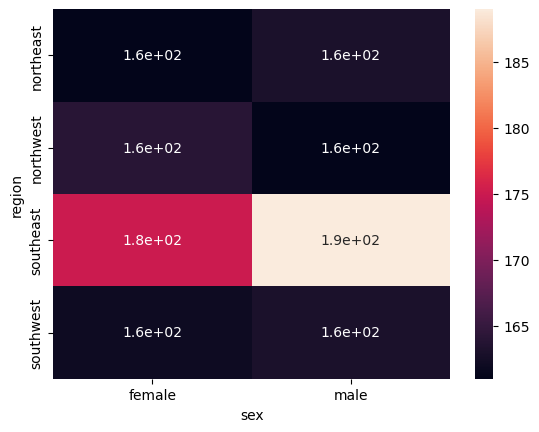

In [9]:
sns.heatmap(pd.crosstab(df['region'],df['sex']), annot=True)

<Axes: xlabel='sex', ylabel='region'>

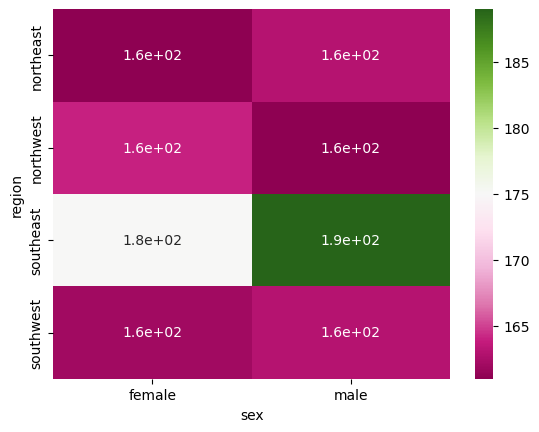

In [10]:
sns.heatmap(pd.crosstab(df['region'],df['sex']),annot=True, cmap='PiYG')

**(above) Region and Sex:** There seems to be clearly more men in the southeast than other regions, but does this mean the region indicates something about sex?

**(below) Smokers and Sex:** Remember how there seemed to be a difference between men and women and their choice to smoke? Here are some heatmaps, but there doesn't seem to be much of a difference between men and women! What will a chi-square test say?

<Axes: xlabel='smoker', ylabel='sex'>

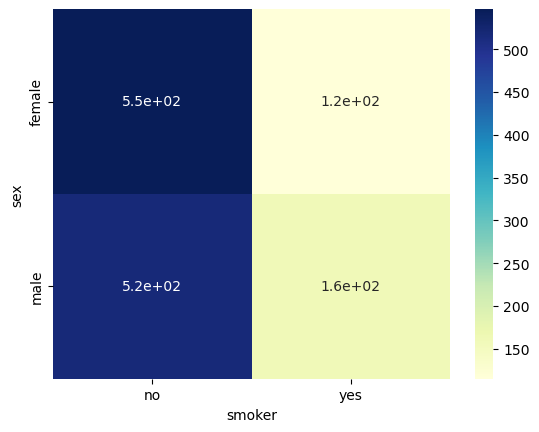

In [11]:
sns.heatmap(pd.crosstab(df['sex'],df['smoker']),annot=True, cmap='YlGnBu')

<Axes: xlabel='smoker', ylabel='sex'>

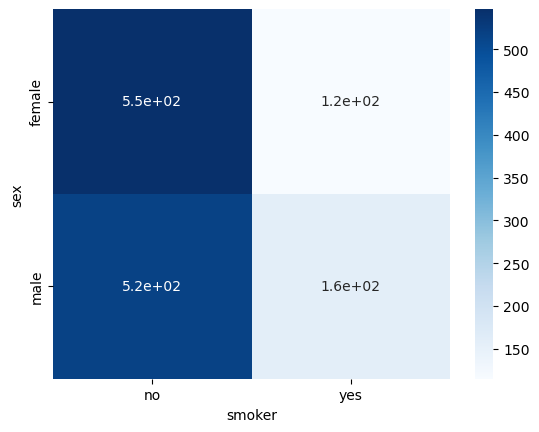

In [12]:
sns.heatmap(pd.crosstab(df['sex'],df['smoker']),annot=True, cmap='Blues')

**Region and smoker:** There seems to be more smokers in the southeast, but is this significant? 

<Axes: xlabel='smoker', ylabel='region'>

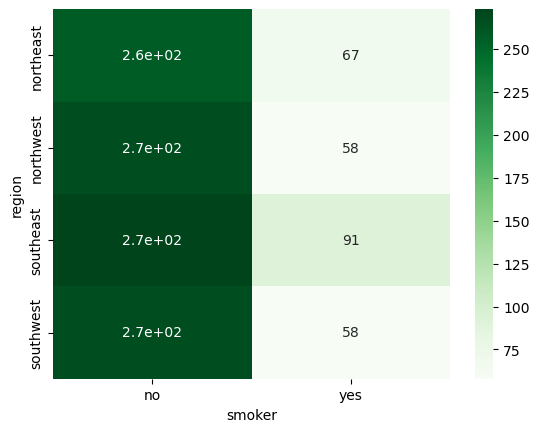

In [13]:
sns.heatmap(pd.crosstab(df['region'],df['smoker']),annot=True, cmap='Greens')

<Axes: xlabel='smoker', ylabel='region'>

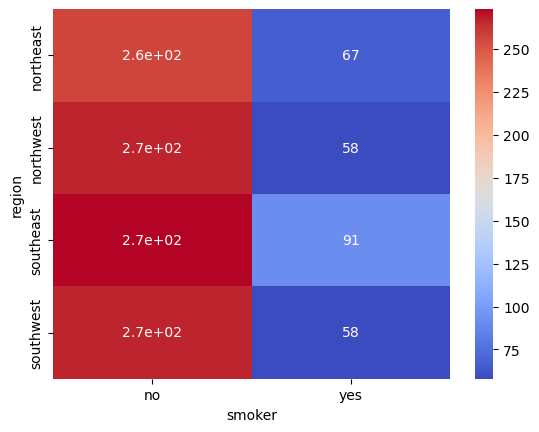

In [14]:
sns.heatmap(pd.crosstab(df['region'],df['smoker']),annot=True, cmap='coolwarm')

MORE COLORFUL OPTIONS: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps

**CHI-SQUARE TEST:** Is there *actually* anything significant in any of these categories, visualization, or charts above? First, save each of these crosstabs as variables, as they will directly calculate our chi-square statistic and p-value.

In [15]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

smokersex = pd.crosstab(df['smoker'],df['sex'])
regionsex = pd.crosstab(df['region'],df['sex'])
regionsmoker = pd.crosstab(df['region'],df['smoker'])


**Chi-Square Distribution:** An easy quick source on the distribution is on Wikipedia - https://en.wikipedia.org/wiki/Chi-squared_distribution. Like our other tests, we are saying that the probability of seeing a difference in categories if there is no difference at all follows a chi-square distribution. Thus, we get a specific X (chi) statistic which translates into a p-value (the probability of seeing our data if there is actually no difference between categories)

**X:** Chi-square statistic <br>
**p**: p-value (look for less than 0.05, the magic number) <br>
**dof**: degrees of freedom, which you can read about on your own <br>
**contingency-table:** these are the calculations from your crosstab table used to calculate the chi-square statistic

Try printing each of these to the output to see how they look in raw output.

In [16]:
X, p, dof, contingency_table = chi2_contingency(smokersex)
p

0.006548143503580696

In [17]:
X, p, dof, contingency_table = chi2_contingency(regionsex)
p

0.9328921288772233

In [18]:
X, p, dof, contingency_table = chi2_contingency(regionsmoker)
p

0.06171954839170541

**Smoker and Sex:** Even though our heatmap didn't show much of a difference, our p-value = 0.006, showing that there is some relationship between sex (gender) and smoking. In other words, whether someone is male or female is an indicator as to whether they will smoker or not.

**Region and Sex:** Even though our heatmap showed a strong density of men in the southeast, our p-value = 0.93, show that there is NO significant relationship between a particular region and the number of men and women in that region.

**Region and Smoker:** This one is tricky--p-value = 0.06. Not quite 0.05, but very close. Use your brain: based on the numbers in the crosstab, the heatmaps above, and the barcharts, would you say that the region someone lives is an indicator as to whether they will choose to smoker or not?